## import some libraries



In [1]:
import matplotlib.pyplot as plt # for visualisation
import random # for random number generation
import numpy as np # for numerical libraries

random.seed(242785) # seed the random number generators
np.random.seed(64254) 

### Synthesising data

Simulating data allows to understand if the model works under perfect conditions.

For this assignment, We are going to simulate data for a simple model. Here we have a input variable $T$ and an output variable $Z$. 

The relationship between $T$ and $Z$ is given by:
$$
  Z = csin(T+d)
$$
where $c$ and $d$ are model parameters.

In order to simulate data, we therefore have to specify values for $c$ and $d$:
The subscript `_true` to the variable names is to distinguish these values as the true values used to generate the data as supposed to the **predicted** values we will estimate later from data.

In [2]:
c_true = 0.5
d_true = -0.25

Next, We will need some $T$ values. Generating $n=100$ of these values uniformly spaced between 0 and 10 using the `linspace` function from the numpy library:
use 100 random numbers from 0 to 100

In [3]:
n = 100
T = np.linspace(0, 10, num=n)

Now, we need to calculate the $Z$ values according to our given relationship:

In [4]:
Z_true = c_true*np.sin(T+d_true)

Lets plot this in order to visulize the model:

Text(0, 0.5, 'Z')

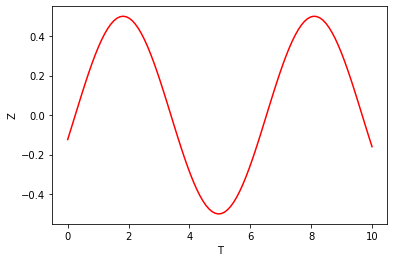

In [5]:
plt.plot(T, Z_true, 'r')
plt.xlabel("T")
plt.ylabel("Z")


For now, this is not the data we usually see in the real world. We can add the noise by simulating random variables from a Normal distribution. We can use the numpy random number generator to simulate the noise (`np.random.normal`): 

In [6]:
sigma2_true = 0.2 # noise variance
e = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_true), size=n)
print(e)# print the noise data

[-0.1384588  -0.43635949  0.672481    0.17930356 -0.69747657  0.50144037
  0.49862829  0.05373879 -0.10935     0.27617605 -0.75788061  0.73446902
 -1.17261888  0.1774417  -0.33536782 -0.39378333  0.17924013  0.14594227
  0.05039945  0.04182671 -0.23668217  0.26550818  0.26323831 -0.19225681
  0.14037148 -0.06616343 -0.06089259  0.13670673  0.27090659 -0.21701978
 -0.03932631 -0.73531956 -0.03519478 -0.86689722  0.58387441  0.46914006
  0.21800743  0.05005694 -0.18645741 -0.45621827  0.35749496  0.03816235
 -0.03853181 -0.5390242  -0.47568671  0.23774279  0.02194264 -0.0372486
 -0.11323079 -0.33138295  0.28076633  0.08756902  1.08366695  0.57734804
 -0.02185295  0.34117064 -0.56552583  0.19139047  0.31549414  0.83222388
  0.33780086  0.57836895  1.06345902  0.06373876  0.06903076  0.13557056
 -0.93220222  0.4558571  -0.07566217 -0.65141535  0.6933032  -0.66928248
 -0.38652592 -0.39798145  0.12735728  0.16104952  1.19513381  0.64808731
  0.05841358  0.44152402  0.32988707  0.09231549  0.

In this assingment, we specify the variance of the noise is the standard deviation squared. 
Next, add the noise we have generated to the true $Z$-values:

In [7]:
Z = Z_true + e

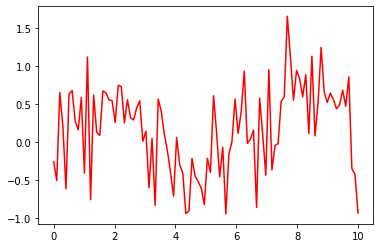

In [8]:
plt.plot(T,Z,'r')# visualize the noise distribution

plot the noisy $(T, Z)$ values over the true ones:

Text(0, 0.5, 'Z')

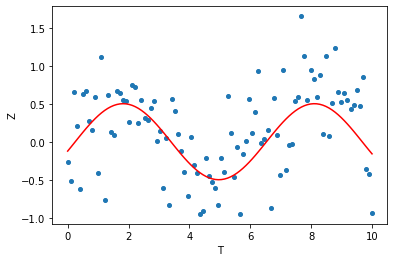

In [9]:
plt.scatter(T, Z, s=16)
plt.plot(T, Z_true, 'r')
plt.xlabel("T")
plt.ylabel("Z")

## Learning

In a real-world setting, we might need to try to guess the relationships between the model .

Now we need to dentify the parameters $(c, d)$ that make our model most consistent with the data.

### Loss function

Given a dataset $D = \{ (T_1, Z_1), \dots, (T_n, Z_n) \}$

The loss function sums over all the errors across the $n$ data points:
$$
  L(\theta) = \sum_{i=1}^n ( Z_i - \hat{Z}_i )^2
$$
where the prediction is given by $\hat{Z_i} = csin(T_i+d)$. 



In [10]:
def loss_fn(c,d, T, Z):
  Z_hat = c*np.sin(T+d) # generate prediction of Z based on T and parameters (c, d)
  L = np.sum( (Z- Z_hat)**2 ) # compute total loss
  return L # return loss


### Optimisation

The goal is to find parameters that *minimise* the total loss:
$$
  \hat{\theta} = \arg \min_{\theta} L(\theta)
$$

We will use **gradient descent** to find the parameters that minimise the loss function:

$$
  \theta' \leftarrow \theta - \lambda \nabla L(\theta)
$$



### Stochastic Gradient Descent

Instead of computing the entire gradient term which requires evaluating all $n$ data points, we choose a small batch of data points and use this subset to estimate the gradient. In this assignment, we use only one data point need be held in computer memory at any time.

In [11]:
n_its = 3000 # optimisation septs
lam = 0.0009 # step size
c = 1 # initial value for c
d = -1 #intitial value for d
# set up arrays to store output from each step in the optimisation process
loss_values = np.zeros(n_its)
c_values = np.zeros(n_its)
d_values = np.zeros(n_its)

At each step of our optimisation procedure we now randomly sample a data pair $(T_j, Z_j)$ which we use to estimate the gradient rather than all $n$ samples.

Derivative of the loss function with respect to c= $-2(Z_i-\hat{Z}_i)sin(T+d))$

Derivative of the loss function with respect to d= $-2c(Z_i-\hat{Z}_i )cos(T+d))$


In [12]:
# iterate process
for it in range(n_its):

  # sample one random data pair (T, Z)
  j = np.random.random_integers(0, n-1)
  Tj = T[j]
  Zj = Z[j]
  Zj_hat = c*np.sin(Tj+d) # get predicted values for Z based on the current parameters values for (c,d)
  
  dldc = np.sum( -2*(Zj-Zj_hat)*np.sin(Tj+d) ) # compute the derivative of the loss function with respect to c, dL/dc
  dldd = np.sum( -2*c*(Zj-Zj_hat)*np.cos(Tj+d) )# compute the derivative of the loss function with respect to d, dL/dd
  c = c - lam*n*dldc # multiply by n to get estimate of gradient
  d = d - lam*n*dldd # multiply by n to get estimate of gradient

  loss_values[it] = loss_fn(c, d, T, Z)# compute loss function at current parameters
  c_values[it] = c # store current c value
  d_values[it] = d # store current d value

<ipython-input-12-904cf872ef56>:5: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  j = np.random.random_integers(0, n-1)


Let's plot the loss values, this is to check whether the algorithm has truly converged to the minimum of the loss function.

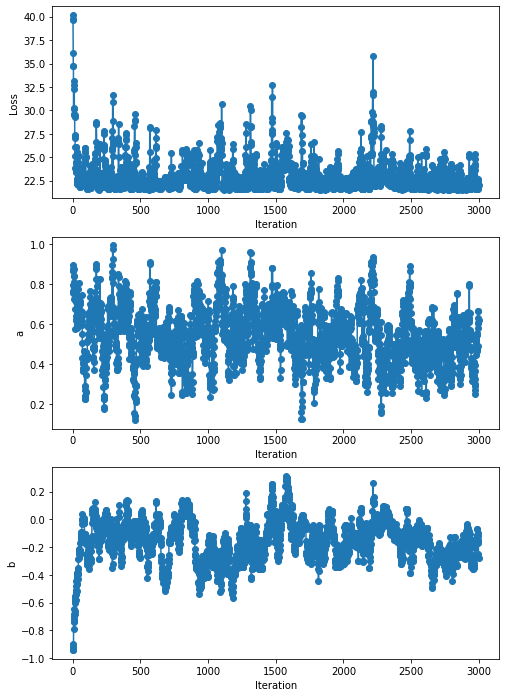

In [13]:
# set up a mutiple plot figure(3 rows, 1 column)with three plotting axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# the loss values
ax1.plot(loss_values, 'o-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
# the c values
ax2.plot(c_values, 'o-')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('a')
# the d values
ax3.plot(d_values, 'o-')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('b')
plt.show()